In [1]:
import math
import random
import numpy as np
from sklearn import datasets,cluster
import matplotlib.pyplot as plt

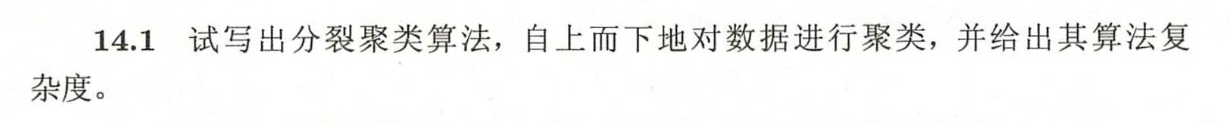

In [9]:
# define a function to do decisive clustering
def decisive_clustering(data, k, m, n, max_iter):
    # k: the number of clusters
    # m: the fuzzifier
    # n: the number of data points
    # initialize the centers
    centers = []
    for i in range(k):
        centers.append(data[random.randint(0, n-1)])
    centers = np.array(centers)
    # initialize the membership matrix
    U = np.zeros((n, k))
    for i in range(n):
        U[i][random.randint(0, k-1)] = 1
    # iterate
    for iter in range(max_iter):
        # update the centers
        for i in range(k):
            numerator = 0
            denominator = 0
            for j in range(n):
                numerator += U[j][i] * data[j]
                denominator += U[j][i]
            centers[i] = numerator / denominator
        # update the membership matrix
        for i in range(n):
            for j in range(k):
                sum = 0
                for l in range(k):
                    sum += (np.linalg.norm(data[i] - centers[j]) / np.linalg.norm(data[i] - centers[l])) ** (2 / (m - 1))
                U[i][j] = 1 / sum
    return U

In [10]:
# define a function to plot the result
def plot_result(data, U, k, m, n):
    # plot the data points
    plt.scatter(data[:, 0], data[:, 1], c='b', s=5)
    # plot the centers
    centers = []
    for i in range(k):
        numerator = 0
        denominator = 0
        for j in range(n):
            numerator += U[j][i] * data[j]
            denominator += U[j][i]
        centers.append(numerator / denominator)
    centers = np.array(centers)
    plt.scatter(centers[:, 0], centers[:, 1], c='r', s=50, marker='x')
    # plot the membership
    for i in range(n):
        max = 0
        for j in range(k):
            if U[i][j] > U[i][max]:
                max = j
        plt.plot([data[i][0], centers[max][0]], [data[i][1], centers[max][1]], c='g', linewidth=0.5)
    plt.show()

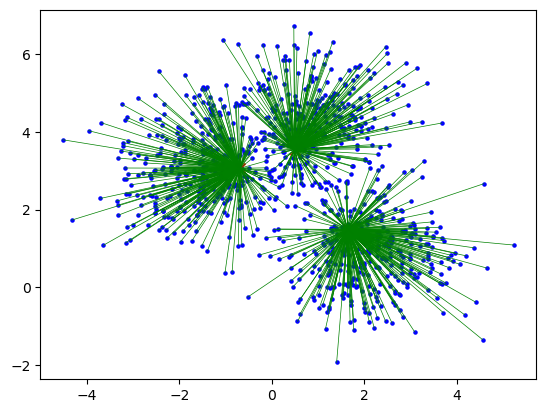

In [11]:
data = datasets.make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=1.0, random_state=0)
data = np.array(data[0])
n = len(data)
k = 3
m = 2
max_iter = 100
U = decisive_clustering(data, k, m, n, max_iter)
plot_result(data, U, k, m, n)


# 算法的时间复杂度为O(kn)，空间复杂度为O(kn)。